,Mean Radius,Mean Radius
Mean Radius,1.0,1.0
Mean Radius,1.0,1.0


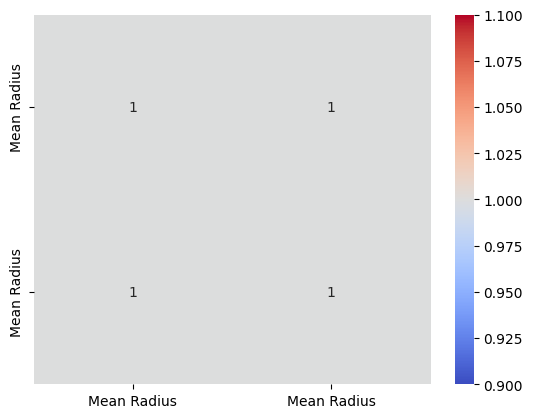

In [5]:
import pandas as pd
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Load the dataset
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data", header=None)
df.columns = ["ID", "Diagnosis", "Mean Radius", "Mean Texture", "Mean Perimeter", "Mean Area", "Mean Smoothness",
              "Mean Compactness", "Mean Concavity", "Mean Concave Points", "Mean Symmetry", "Mean Fractal Dimension",
              "SE Radius", "SE Texture", "SE Perimeter", "SE Area", "SE Smoothness", "SE Compactness", "SE Concavity",
              "SE Concave Points", "SE Symmetry", "SE Fractal Dimension", "Worst Radius", "Worst Texture",
              "Worst Perimeter", "Worst Area", "Worst Smoothness", "Worst Compactness", "Worst Concavity",
              "Worst Concave Points", "Worst Symmetry", "Worst Fractal Dimension"]

# Define the sliders
feature1_dropdown = widgets.Dropdown(options=list(df.columns[2:]), description='Feature 1:')
feature2_dropdown = widgets.Dropdown(options=list(df.columns[2:]), description='Feature 2:')
metric_dropdown = widgets.Dropdown(options=['pearson', 'kendall', 'spearman'], description='Metric:')

# Define the correlation matrix function
def corr_matrix(feature1, feature2, metric):
    corr = df[[feature1, feature2]].corr(method=metric)
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    display(corr)

# Define the callback function for the sliders
def update_corr_matrix(change):
    feature1 = feature1_dropdown.value
    feature2 = feature2_dropdown.value
    metric = metric_dropdown.value
    corr_matrix(feature1, feature2, metric)

# Register the callback function with the sliders
feature1_dropdown.observe(update_corr_matrix, 'value')
feature2_dropdown.observe(update_corr_matrix, 'value')
metric_dropdown.observe(update_corr_matrix, 'value')

# Display the sliders and initial correlation matrix
display(widgets.VBox([feature1_dropdown, feature2_dropdown, metric_dropdown]))
corr_matrix(feature1_dropdown.value, feature2_dropdown.value, metric_dropdown.value)
